<a href="https://colab.research.google.com/github/dattali18/machine_learning_msc_project/blob/research/daniel/notebook/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Dataset

## Context

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

## Content
Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

## Data Preprocessing

In [1]:
DATA_PATH = "https://github.com/dattali18/machine_learning_msc_project/blob/main/db/heart.csv?raw=true"

In [2]:
import pandas as pd

In [3]:
heart_data = pd.read_csv(DATA_PATH)

In [4]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
full_name_attrs = [
    'age',
    'sex',
    'chest pain type',
    'resting blood pressure',
    'serum colestoral mg/dl',
    'fasting blood sugar > 120 mg/dl',
    'resting electrocardiographic results',
    'maximum heart rate achieved',
    'exercise induced angina',
    'oldpeak = ST depression induced by exercise relative to rest',
    'the slope of the peak exercise ST segment',
    'number of major vessels (0-3) colored by flourosopy',
    'thal: 0 = normal; 1 = fixed defect; 2 = reversable defect'
]

In [6]:
# split the data into 80-20 train-test using  scikit-learn
from sklearn.model_selection import train_test_split

In [7]:
# the target attribute is 'target'
X = heart_data.drop('target', axis=1)
y = heart_data['target']

In [8]:
# print the shape of X, y
X.shape, y.shape

((1025, 13), (1025,))

In this part we will do scaling for the distance based model K-NN, SVM

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X_scaled = scaler.fit_transform(X)


In [12]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("Shape of X_scaled DataFrame:", X_scaled.shape)
display(X_scaled.head())

Shape of X_scaled DataFrame: (1025, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


Now `X_scaled` is a DataFrame with the original column names. This will ensure that subsequent operations, especially when using models or visualizations that benefit from named features, can correctly interpret the data.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True, stratify=None
)

In [14]:
X_train_scaled, X_test_scaled, y_train, y_test =  train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=True, stratify=None
)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820,), (205,))

## Distance Based Models

### K-NN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

#### Scaled data

In [17]:
knn_simple_scaled = KNeighborsClassifier(n_neighbors=5)

knn_simple_scaled.fit(X_train_scaled, y_train)

y_pred_simple_scaled = knn_simple_scaled.predict(X_test_scaled)

print("--- Simple k-NN (k=5) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_simple_scaled):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_simple_scaled))

--- Simple k-NN (k=5) ---
Accuracy: 0.8341

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {
    'n_neighbors': list(range(2, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'] # Testing different distance metrics
}

In [20]:
grid_search_scaled = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search_scaled.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 116 candidates, totalling 580 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [21]:
print("\n--- Grid Search Results ---")
print(f"Best Parameters: {grid_search_scaled.best_params_}")
print(f"Best Cross-Validation Score: {grid_search_scaled.best_score_:.4f}")


--- Grid Search Results ---
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 28, 'weights': 'distance'}
Best Cross-Validation Score: 0.9854


In [22]:
best_knn_scaled = grid_search_scaled.best_estimator_
y_pred_best_scaled = best_knn_scaled.predict(X_test_scaled)

print(f"\nFinal Test Accuracy (Optimized): {accuracy_score(y_test, y_pred_best_scaled):.4f}")
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_best_scaled))


Final Test Accuracy (Optimized): 1.0000

Optimized Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



#### Unscaled Data

In [23]:
knn_simple = KNeighborsClassifier(n_neighbors=5)

knn_simple.fit(X_train, y_train)

y_pred_simple = knn_simple.predict(X_test)

print("--- Simple k-NN (k=5) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_simple):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_simple))

--- Simple k-NN (k=5) ---
Accuracy: 0.7317

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



In [24]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 116 candidates, totalling 580 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [25]:
print("\n--- Grid Search Results ---")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")


--- Grid Search Results ---
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
Best Cross-Validation Score: 0.9720


In [26]:
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)

print(f"\nFinal Test Accuracy (Optimized): {accuracy_score(y_test, y_pred_best):.4f}")
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_best))


Final Test Accuracy (Optimized): 0.9854

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### SVM

#### Using unscaled data

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [28]:
svm_simple = SVC(kernel='linear', C=1.0)

svm_simple.fit(X_train, y_train)

SVC(kernel='linear')

In [29]:
y_pred_svm = svm_simple.predict(X_test)

print("--- Simple Linear SVM ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

--- Simple Linear SVM ---
Accuracy: 0.8049

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.78       102
           1       0.76      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.82      0.80      0.80       205
weighted avg       0.82      0.80      0.80       205



In [30]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
}

In [ ]:
grid_svm = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=1, cv=5)

grid_svm.fit(X_train, y_train)

print("\n--- SVM Grid Search Results ---")
print(f"Best Parameters: {grid_svm.best_params_}")
print(f"Best CV Score: {grid_svm.best_score_:.4f}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [33]:
best_svm = grid_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)

print(f"\nFinal Test Accuracy (Optimized SVM): {accuracy_score(y_test, y_pred_best_svm):.4f}")
print("\nOptimized SVM Classification Report:")
print(classification_report(y_test, y_pred_best_svm))


Final Test Accuracy (Optimized SVM): 1.0000

Optimized SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



#### Scaled Data

In [34]:
svm_simple_scaled = SVC(kernel='linear', C=1.0)

svm_simple_scaled.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [35]:
y_pred_svm = svm_simple_scaled.predict(X_test)

print("--- Simple Linear SVM ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

--- Simple Linear SVM ---
Accuracy: 0.5171

Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       102
           1       1.00      0.04      0.07       103

    accuracy                           0.52       205
   macro avg       0.75      0.52      0.37       205
weighted avg       0.75      0.52      0.37       205



In [36]:
grid_svm_scaled = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=1, cv=5)

grid_svm_scaled.fit(X_train_scaled, y_train)

print("\n--- SVM Grid Search Results ---")
print(f"Best Parameters: {grid_svm_scaled.best_params_}")
print(f"Best CV Score: {grid_svm_scaled.best_score_:.4f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits

--- SVM Grid Search Results ---
Best Parameters: {'C': 100, 'gamma': 0.1}
Best CV Score: 0.9756


In [37]:
best_svm = grid_svm_scaled.best_estimator_
y_pred_best_svm = grid_svm_scaled.predict(X_test_scaled)

print(f"\nFinal Test Accuracy (Optimized SVM): {accuracy_score(y_test, y_pred_best_svm):.4f}")
print("\nOptimized SVM Classification Report:")
print(classification_report(y_test, y_pred_best_svm))


Final Test Accuracy (Optimized SVM): 0.9854

Optimized SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [38]:
from sklearn.decomposition import PCA

In [39]:
# Create a pca version of X
pca = PCA(n_components=2)
X_pca = pca.fit(X_scaled)

In [42]:
X_pca.components_

array([[ 0.30957429,  0.07807315, -0.28561649,  0.17876028,  0.12798537,
         0.08071345, -0.12949038, -0.41696971,  0.36386912,  0.42178071,
        -0.38010767,  0.26533438,  0.21407015],
       [ 0.3982859 , -0.37907583,  0.27494742,  0.43890862,  0.36981882,
         0.32147582, -0.24476033,  0.09383014, -0.25861347, -0.07052708,
         0.06479208,  0.10585787, -0.18261906]])

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

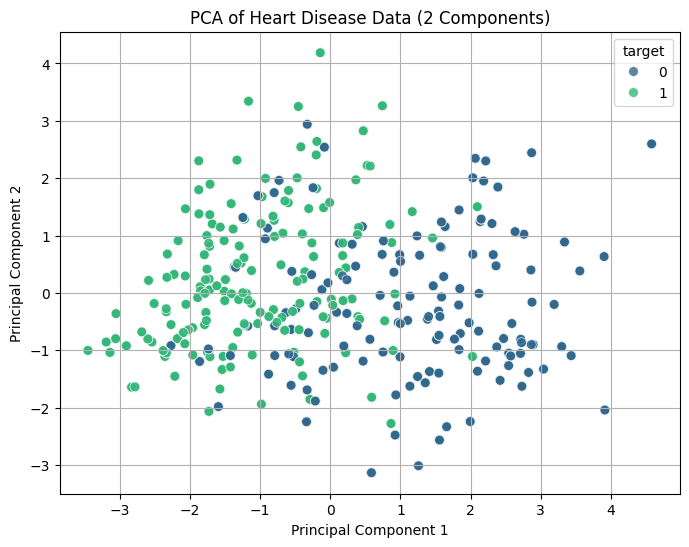

In [46]:
X_pca_transformed = pca.transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca_transformed[:, 0],
    y=X_pca_transformed[:, 1],
    hue=y,
    palette='viridis',
    s=50,
    alpha=0.8
)
plt.title('PCA of Heart Disease Data (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

#### KNN Decision Boundary on PCA Components

In [56]:
# Transform the training and test data using the fitted PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# scale the X_train and X_test
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.fit_transform(X_test_pca)

# Perform GridSearchCV on the PCA-transformed training data
# We'll reuse the param_grid defined earlier for KNN
grid_search_pca = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', verbose=0)
grid_search_pca.fit(X_train_pca, y_train)

best_knn_pca = grid_search_pca.best_estimator_

print(f"Best Parameters for KNN on PCA data: {grid_search_pca.best_params_}")
print(f"Best Cross-Validation Score: {grid_search_pca.best_score_:.4f}")

y_pred_pca = best_knn_pca.predict(X_test_pca)
print(f"\nTest Accuracy (KNN on PCA): {accuracy_score(y_test, y_pred_pca):.4f}")

Best Parameters for KNN on PCA data: {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}
Best Cross-Validation Score: 0.9732

Test Accuracy (KNN on PCA): 0.7073


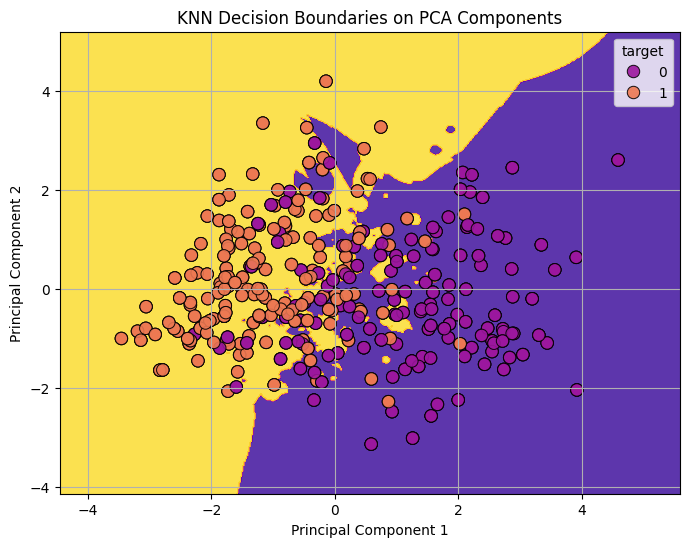

In [57]:
import numpy as np
# Plotting the decision boundaries

# Get min, max and limits for x and y axes for the meshgrid
x_min, x_max = X_pca_transformed[:, 0].min() - 1, X_pca_transformed[:, 0].max() + 1
y_min, y_max = X_pca_transformed[:, 1].min() - 1, X_pca_transformed[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the meshgrid
Z = best_knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap='plasma')

# Plot the actual data points
sns.scatterplot(
    x=X_pca_transformed[:, 0],
    y=X_pca_transformed[:, 1],
    hue=y,
    palette='plasma',
    s=80,
    alpha=0.9,
    edgecolor='k'
)

plt.title('KNN Decision Boundaries on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

#### SVM Decision Boundary on PCA Components

In [58]:
# Perform GridSearchCV for SVM on the PCA-transformed training data
# We'll reuse the param_grid_svm defined earlier
grid_svm_pca = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=0, cv=5)
grid_svm_pca.fit(X_train_pca, y_train)

best_svm_pca = grid_svm_pca.best_estimator_

print(f"Best Parameters for SVM on PCA data: {grid_svm_pca.best_params_}")
print(f"Best Cross-Validation Score: {grid_svm_pca.best_score_:.4f}")

y_pred_svm_pca = best_svm_pca.predict(X_test_pca)
print(f"\nTest Accuracy (SVM on PCA): {accuracy_score(y_test, y_pred_svm_pca):.4f}")
print("\nOptimized SVM Classification Report (PCA):")
print(classification_report(y_test, y_pred_svm_pca))

Best Parameters for SVM on PCA data: {'C': 100, 'gamma': 1}
Best Cross-Validation Score: 0.7390

Test Accuracy (SVM on PCA): 0.6780

Optimized SVM Classification Report (PCA):
              precision    recall  f1-score   support

           0       0.71      0.60      0.65       102
           1       0.66      0.76      0.70       103

    accuracy                           0.68       205
   macro avg       0.68      0.68      0.68       205
weighted avg       0.68      0.68      0.68       205



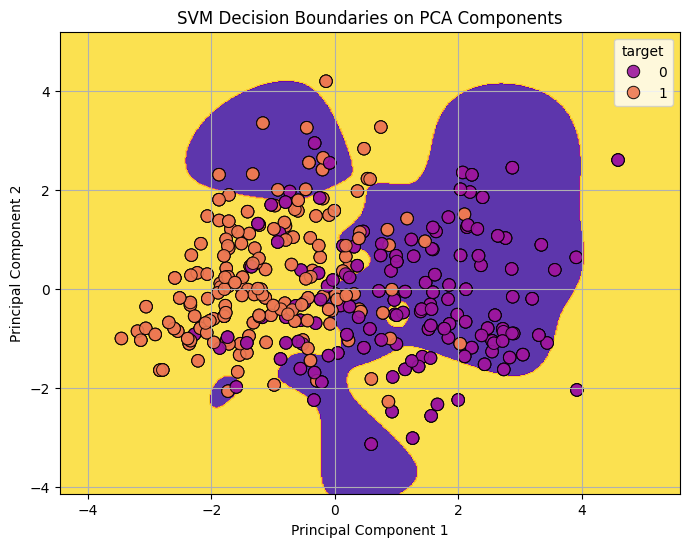

In [59]:
import numpy as np

# Plotting the decision boundaries for SVM

# Get min, max and limits for x and y axes for the meshgrid
x_min, x_max = X_pca_transformed[:, 0].min() - 1, X_pca_transformed[:, 0].max() + 1
y_min, y_max = X_pca_transformed[:, 1].min() - 1, X_pca_transformed[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the meshgrid using the best SVM model
Z_svm = best_svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)

plt.figure(figsize=(8, 6))
# Plot decision boundaries
plt.contourf(xx, yy, Z_svm, alpha=0.8, cmap='plasma')

# Plot the actual data points
sns.scatterplot(
    x=X_pca_transformed[:, 0],
    y=X_pca_transformed[:, 1],
    hue=y,
    palette='plasma',
    s=80,
    alpha=0.9,
    edgecolor='k'
)

plt.title('SVM Decision Boundaries on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()